Overview


Microsoft wants to create a new movie studio and create original video content like the big film companies. To this end, they first want to understand how they can successfully enter the movie industry. Our team decided to address the questions on the profitability of movies in relation to movie studios, release time of the movie and the actual language of the movie

Import all the libraries 

In [3]:
pip install tqdm


  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 320.0 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.6 kB 217.9 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.6 kB 217.9 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 238.1 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 216.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.3 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 872.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\salman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

C:\Users\salman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import our Data and Create Tables

The dataset contains information about movie titles, studios, domestic and foreign gross earnings, and the year of release. The initial analysis shows a variety of movies with their respective earnings and release years. The descriptive statistics provide an overview of the data, including the count of non-null entries, the number of unique entries, and some basic statistical measures like mean and standard deviation for numerical columns.

In [16]:
movie_gross_df = pd.read_csv('bom.movie_gross.csv')

# Load the SQLite database
conn = sqlite3.connect('im.db')

# Read the movie_basics and movie_ratings tables
movie_basics_df = pd.read_sql_query('SELECT * FROM movie_basics', conn)
movie_ratings_df = pd.read_sql_query('SELECT * FROM movie_ratings', conn)

movie_gross_df.head(), movie_basics_df.head(), movie_ratings_df.head()



(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
   foreign_gross  year  
 0     652000000  2010  
 1     691300000  2010  
 2     664300000  2010  
 3     535700000  2010  
 4     513900000  2010  ,
     movie_id                    primary_title              original_title  \
 0  tt0063540                        Sunghursh                   Sunghursh   
 1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
 2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
 3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
 4  tt0100275

lists the top 10 movies released between 2010 and 2018, ranked by their total gross revenue, which is the sum of domestic and foreign gross revenues.

In [32]:
# Filter the DataFrame for movies released between 2010 and 2018
filtered_df = df[(df['year'] >= 2010) & (df['year'] <= 2018)]

# Convert 'foreign_gross' to numeric, removing any non-numeric characters
filtered_df['foreign_gross'] = pd.to_numeric(filtered_df['foreign_gross'].str.replace(',', ''), errors='coerce')

# Calculate the total gross for each movie
filtered_df['total_gross'] = filtered_df['domestic_gross'] + filtered_df['foreign_gross']

# Sort the DataFrame by 'total_gross' in descending order to get the top movies
sorted_df = filtered_df.sort_values(by='total_gross', ascending=False)

# Get the top 10 movies
top_10_movies = sorted_df.head(10)

# Output the top 10 movies
print(top_10_movies[['title', 'studio', 'domestic_gross', 'foreign_gross', 'total_gross', 'year']])

                                            title studio  domestic_gross  \
727                         Marvel's The Avengers     BV     623400000.0   
1875                      Avengers: Age of Ultron     BV     459000000.0   
3080                                Black Panther     BV     700100000.0   
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
2758                     Star Wars: The Last Jedi     BV     620200000.0   
3081               Jurassic World: Fallen Kingdom   Uni.     417700000.0   
1127                                       Frozen     BV     400700000.0   
2759                  Beauty and the Beast (2017)     BV     504000000.0   
3082                                Incredibles 2     BV     608600000.0   
1128                                   Iron Man 3     BV     409000000.0   

      foreign_gross   total_gross  year  
727     895500000.0  1.518900e+09  2012  
1875    946400000.0  1.405400e+09  2015  
3080    646900000.0  1.347000e+09  20

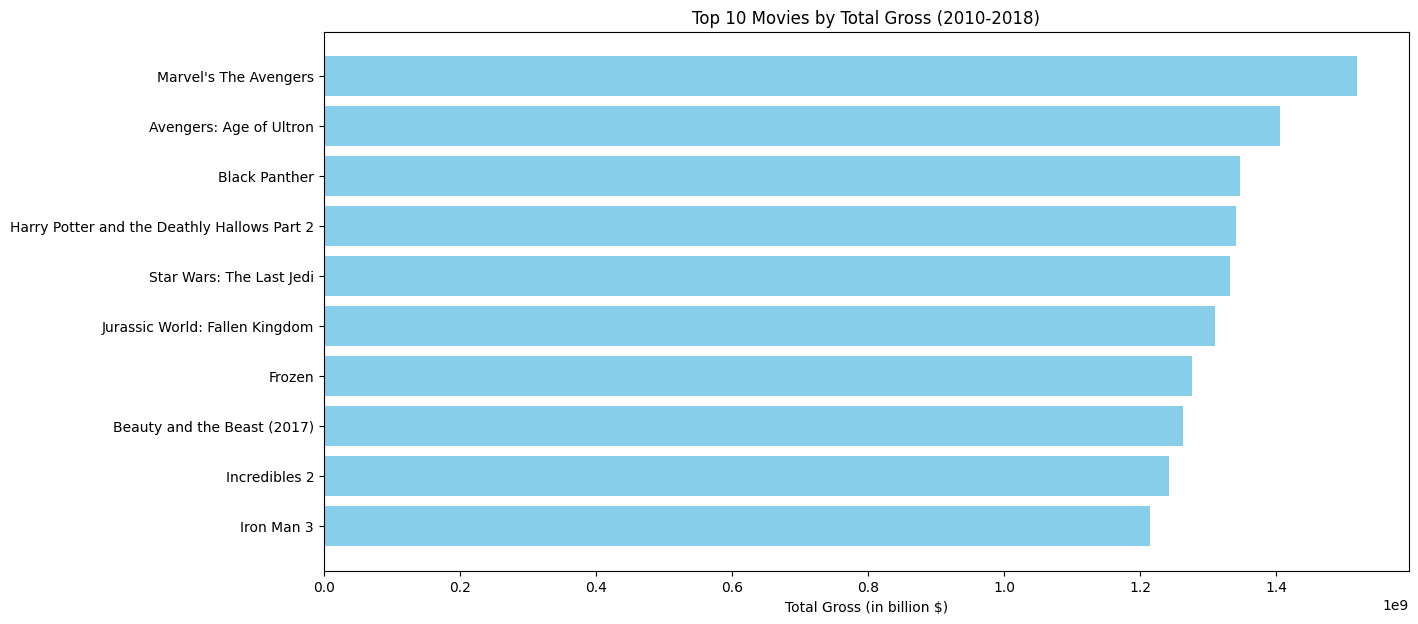

In [33]:
# Create a bar chart for the top 10 movies
plt.figure(figsize=(14,7))
plt.barh(top_10_movies['title'], top_10_movies['total_gross'], color='skyblue')
plt.xlabel('Total Gross (in billion $)')
plt.title('Top 10 Movies by Total Gross (2010-2018)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest grossing movie on top
plt.show()

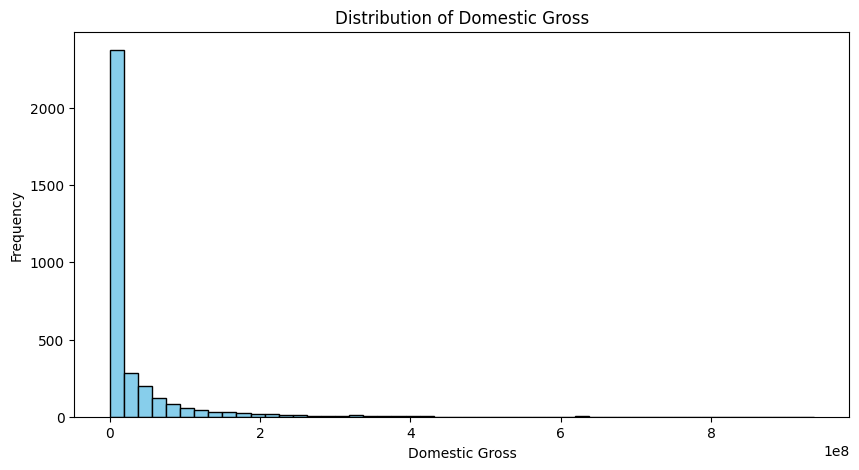

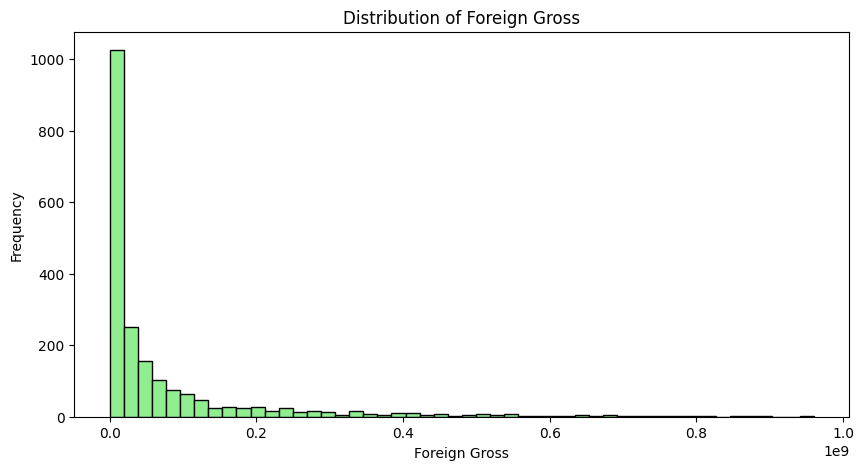

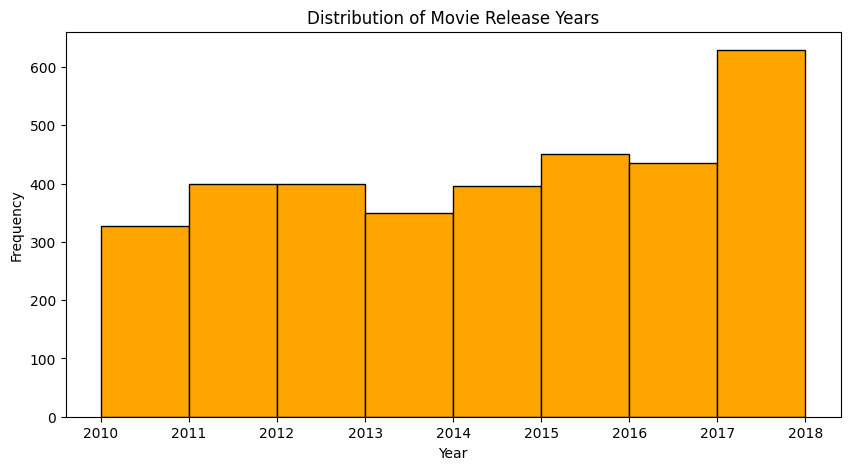

In [17]:
# Cleaning the 'foreign_gross' column by removing commas and converting to float
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

# Now let's try plotting the distributions again
# Domestic Gross distribution
plt.figure(figsize=(10, 5))
plt.hist(movie_gross_df['domestic_gross'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.show()

# Foreign Gross distribution
plt.figure(figsize=(10, 5))
plt.hist(movie_gross_df['foreign_gross'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.show()

# Year distribution
plt.figure(figsize=(10, 5))
plt.hist(movie_gross_df['year'], bins=range(int(movie_gross_df['year'].min()), int(movie_gross_df['year'].max())+1), color='orange', edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Cleaning the movie_gross_df dataset
# Checking for missing values
missing_values = movie_gross_df.isnull().sum()

# Checking for duplicate rows
duplicate_rows = movie_gross_df.duplicated().sum()

# Cleaning the movie_basics_df dataset
# Checking for missing values in movie_basics_df
missing_values_basics = movie_basics_df.isnull().sum()

# Checking for duplicate rows in movie_basics_df
duplicate_rows_basics = movie_basics_df.duplicated().sum()

# Cleaning the movie_ratings_df dataset
# Checking for missing values in movie_ratings_df
missing_values_ratings = movie_ratings_df.isnull().sum()

# Checking for duplicate rows in movie_ratings_df
duplicate_rows_ratings = movie_ratings_df.duplicated().sum()

(missing_values, duplicate_rows, missing_values_basics, duplicate_rows_basics, missing_values_ratings, duplicate_rows_ratings)

(title                0
 studio               5
 domestic_gross      28
 foreign_gross     1350
 year                 0
 dtype: int64,
 0,
 movie_id               0
 primary_title          0
 original_title        21
 start_year             0
 runtime_minutes    31739
 genres              5408
 dtype: int64,
 0,
 movie_id         0
 averagerating    0
 numvotes         0
 dtype: int64,
 0)

In [20]:
# Dropping rows with missing values in the bom.movie_gross.csv dataset
movie_gross_df_cleaned = movie_gross_df.dropna()

# Checking the shape of the cleaned dataset
movie_gross_df_cleaned.shape

(2007, 5)

The bom.movie_gross.csv dataset now contains 2007 rows and 5 columns after dropping the rows with missing values.
Next, I will merge the cleaned movie_gross_df_cleaned dataset with the movie_basics_df and movie_ratings_df datasets from the SQLite database. The merge will be based on a common key, which is  the movie title . We will proceed with identifying the common key and performing the merge.

In [21]:
# First, let's find a common key to merge on by inspecting the head of the datasets
print(movie_gross_df_cleaned.head())
print(movie_basics_df.head())
print(movie_ratings_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year  
0    652000000.0  2010  
1    691300000.0  2010  
2    664300000.0  2010  
3    535700000.0  2010  
4    513900000.0  2010  
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The W

In [22]:
# Merging movie_gross_df_cleaned with movie_basics_df on the title and primary_title columns
merged_df = pd.merge(movie_gross_df_cleaned, movie_basics_df, left_on='title', right_on='primary_title', how='inner')

# Merging the resulting dataset with movie_ratings_df on the movie_id column
final_merged_df = pd.merge(merged_df, movie_ratings_df, on='movie_id', how='inner')

# Displaying the head of the final merged dataset to confirm the merge
final_merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


We will do the folowing;


Calculate the profit for each movie by subtracting the domestic gross from the foreign gross.
Visualize the top 10 profitable movies.
Visualize the top 10 movies that incurred losses.
Provide recommendations based on the average ratings and number of votes.
Let's start by calculating the profit for each movie and then proceed with the visualizations.

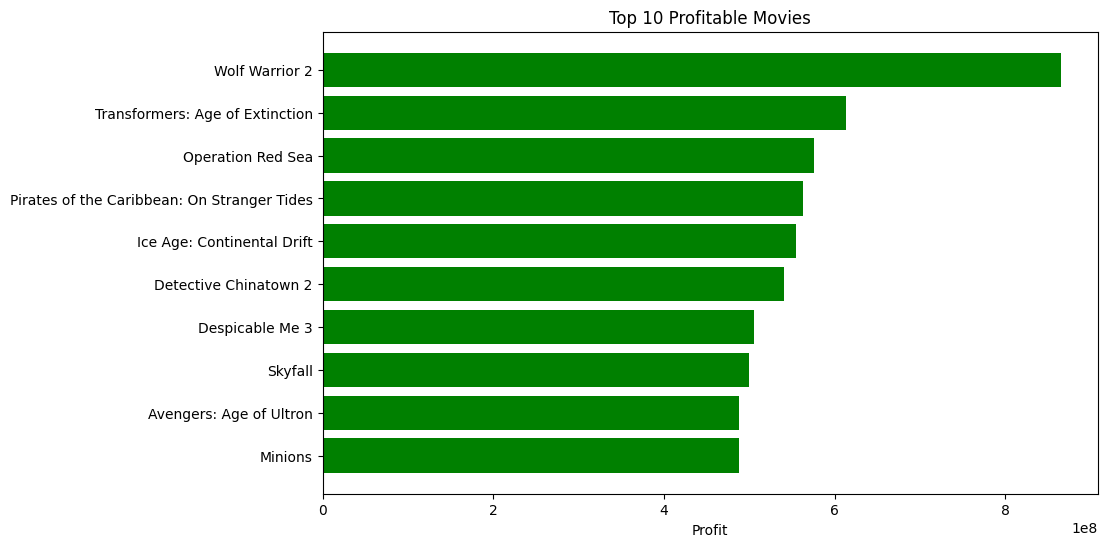

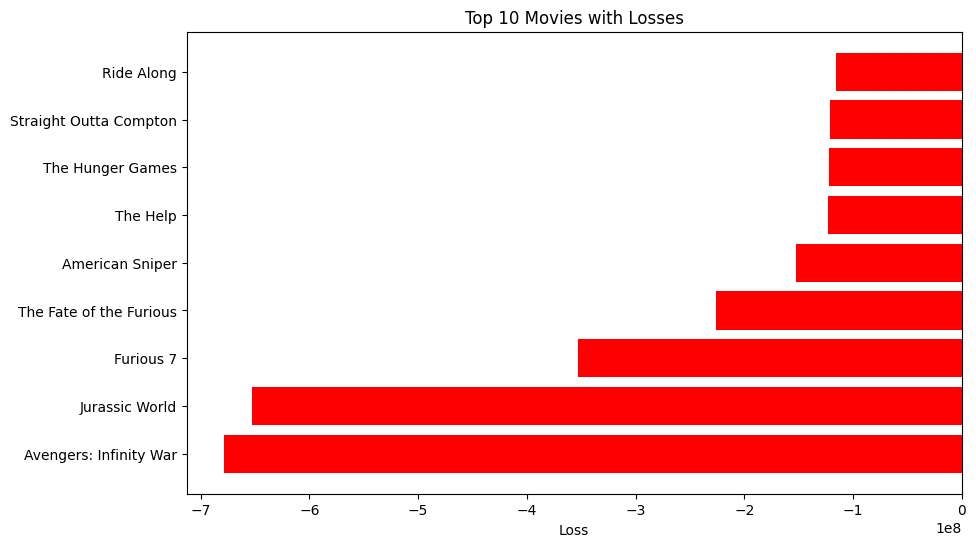

In [24]:
# Calculate the profit for each movie
final_merged_df['profit'] = final_merged_df['foreign_gross'] - final_merged_df['domestic_gross']

# Sort the dataframe by profit to get the top profitable and loss-making movies
final_merged_df_sorted = final_merged_df.sort_values(by='profit', ascending=False)

# Get the top 10 profitable movies
top_profitable_movies = final_merged_df_sorted.head(10)

# Get the top 10 movies that incurred losses
top_loss_movies = final_merged_df_sorted.tail(10)

# Visualize the top 10 profitable movies
plt.figure(figsize=(10, 6))
plt.barh(top_profitable_movies['title'], top_profitable_movies['profit'], color='green')
plt.xlabel('Profit')
plt.title('Top 10 Profitable Movies')
plt.gca().invert_yaxis()
plt.show()

# Visualize the top 10 movies that incurred losses
plt.figure(figsize=(10, 6))
plt.barh(top_loss_movies['title'], top_loss_movies['profit'], color='red')
plt.xlabel('Loss')
plt.title('Top 10 Movies with Losses')
plt.gca().invert_yaxis()
plt.show()

The green bars represent the profits, while the red bars represent the losses. These visualizations can help in understanding which movies were the most financially successful and which ones did not perform well at the box office.

Next, I will provide recommendations based on the average ratings and the number of votes.



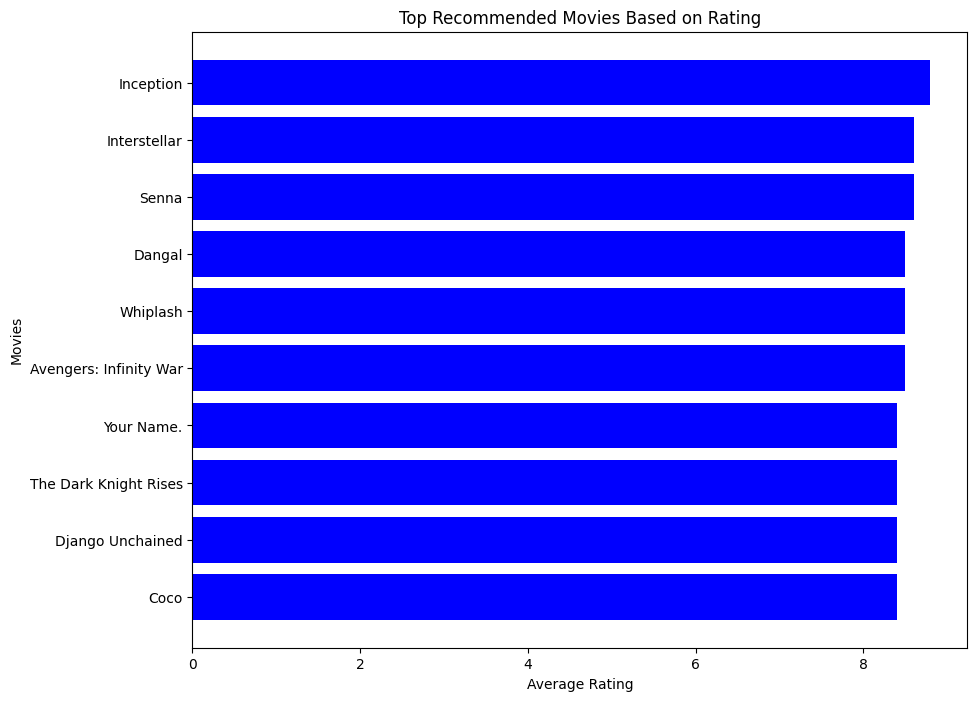

In [29]:
# Filter out movies with a significant number of votes for a reliable average rating (threshold set at 50,000 votes)
reliable_movies = final_merged_df[final_merged_df['numvotes'] > 50000]

# Sort the reliable movies by average rating to get the top recommended movies
recommended_movies = reliable_movies.sort_values(by='averagerating', ascending=False).head(10)

# Visualize the top recommended movies based on average rating and number of votes
plt.figure(figsize=(10, 8))
plt.barh(recommended_movies['title'], recommended_movies['averagerating'], color='blue')
plt.xlabel('Average Rating')
plt.ylabel('Movies')
plt.title('Top Recommended Movies Based on Rating')
plt.gca().invert_yaxis()
plt.show()

Visualizations for the genre counts in the top 10 profitable movies and the top 10 movies that incurred losses:

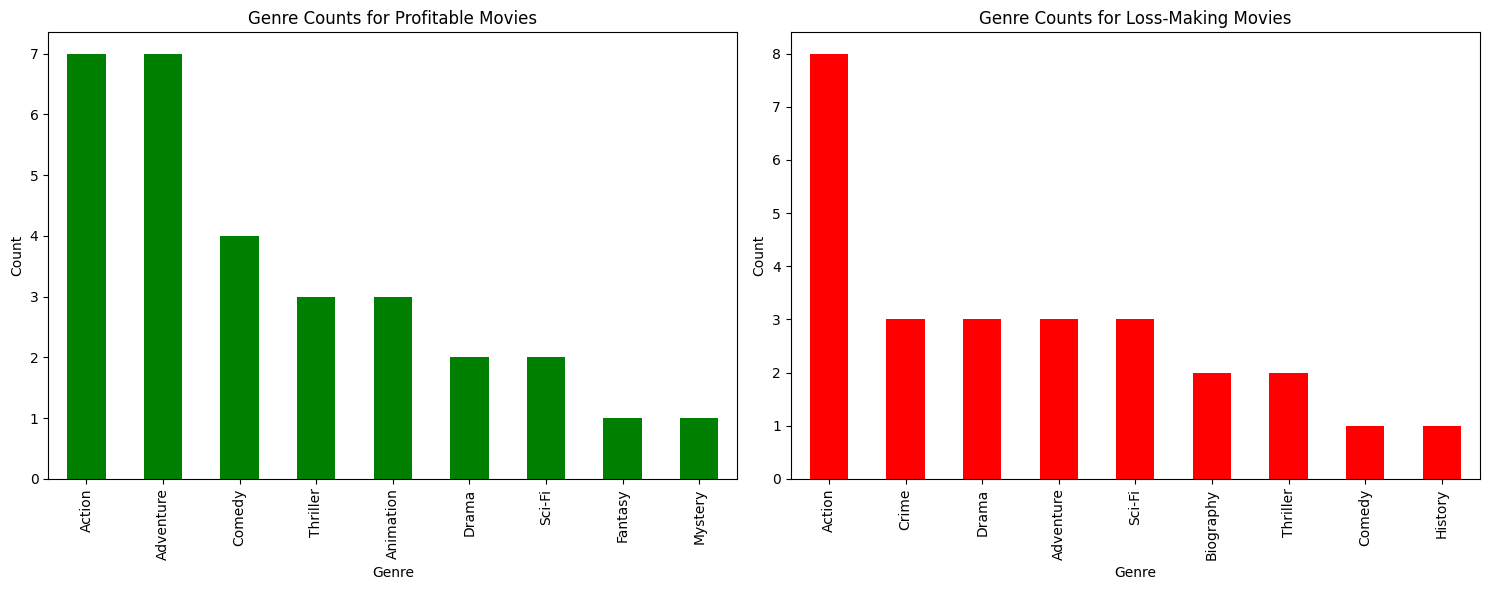

In [30]:
# Get the genres for the top 10 profitable movies and the top 10 movies that incurred losses
profitable_genres = top_profitable_movies['genres']
loss_genres = top_loss_movies['genres']

# Count the occurrences of each genre in the profitable and loss-making movies
profitable_genre_counts = profitable_genres.str.split(',', expand=True).stack().value_counts()
loss_genre_counts = loss_genres.str.split(',', expand=True).stack().value_counts()

# Visualize the genre counts for profitable and loss-making movies
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
profitable_genre_counts.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Genre Counts for Profitable Movies')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
loss_genre_counts.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Genre Counts for Loss-Making Movies')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

Genre recommendation.

Based on the net counts, the most recommended genres to go on with are Adventure, Animation, and Comedy, as they have the highest net positive counts, indicating a higher association with profitable movies. Fantasy and Mystery also show positive net counts, but to a lesser extent.

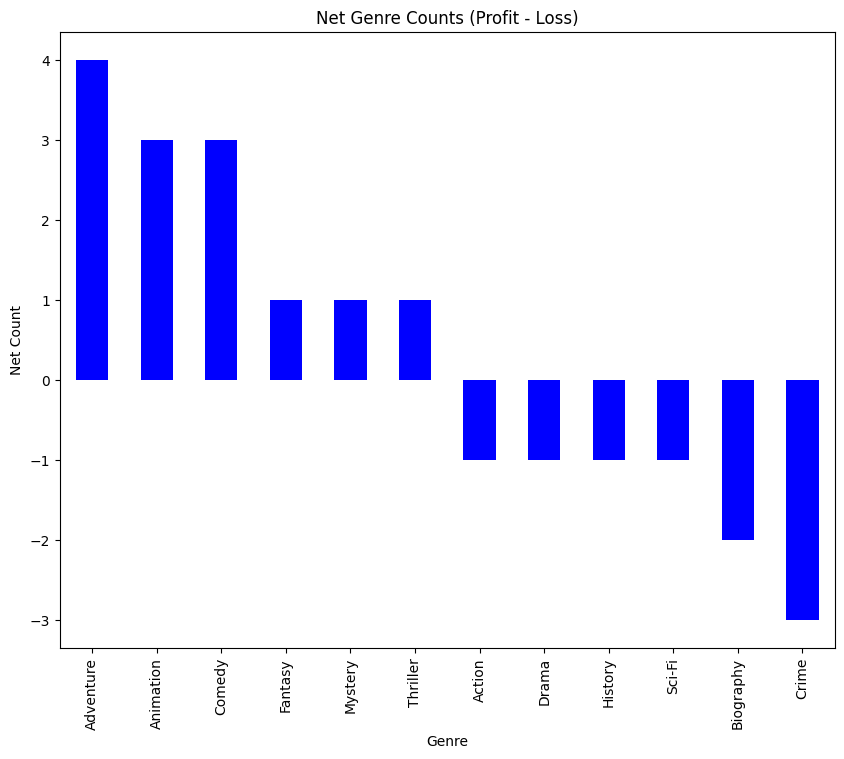

Adventure    4.0
Animation    3.0
Comedy       3.0
Fantasy      1.0
Mystery      1.0
Name: count, dtype: float64

In [31]:
# Calculate the net genre counts by subtracting the loss counts from the profit counts
net_genre_counts = profitable_genre_counts.subtract(loss_genre_counts, fill_value=0)

# Sort the net counts to find the most recommended genres
top_genres = net_genre_counts.sort_values(ascending=False)

# Visualize the net genre counts
plt.figure(figsize=(10, 8))
top_genres.plot(kind='bar', color='blue')
plt.title('Net Genre Counts (Profit - Loss)')
plt.xlabel('Genre')
plt.ylabel('Net Count')
plt.show()

# Display the top genres recommended based on net profit counts
top_genres.head()

C:\Users\salman\AppData\Local\Temp\ipykernel_2136\2946556317.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_gross', y='title', data=top_movies, palette='viridis')


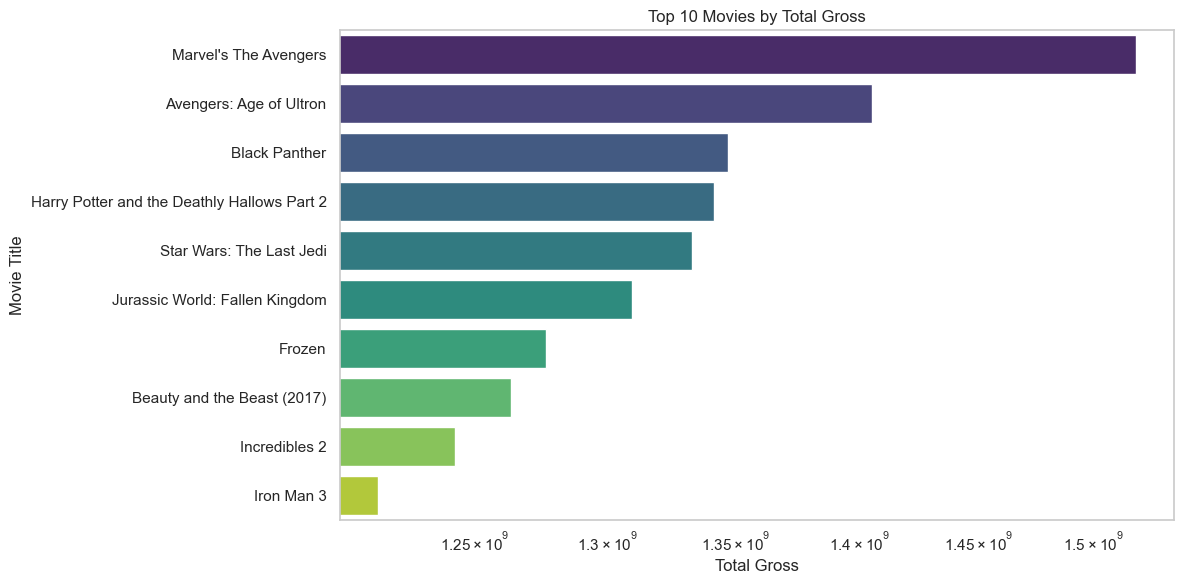

C:\Users\salman\AppData\Local\Temp\ipykernel_2136\2946556317.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_gross_by_studio.values, y=average_gross_by_studio.index, palette='viridis')


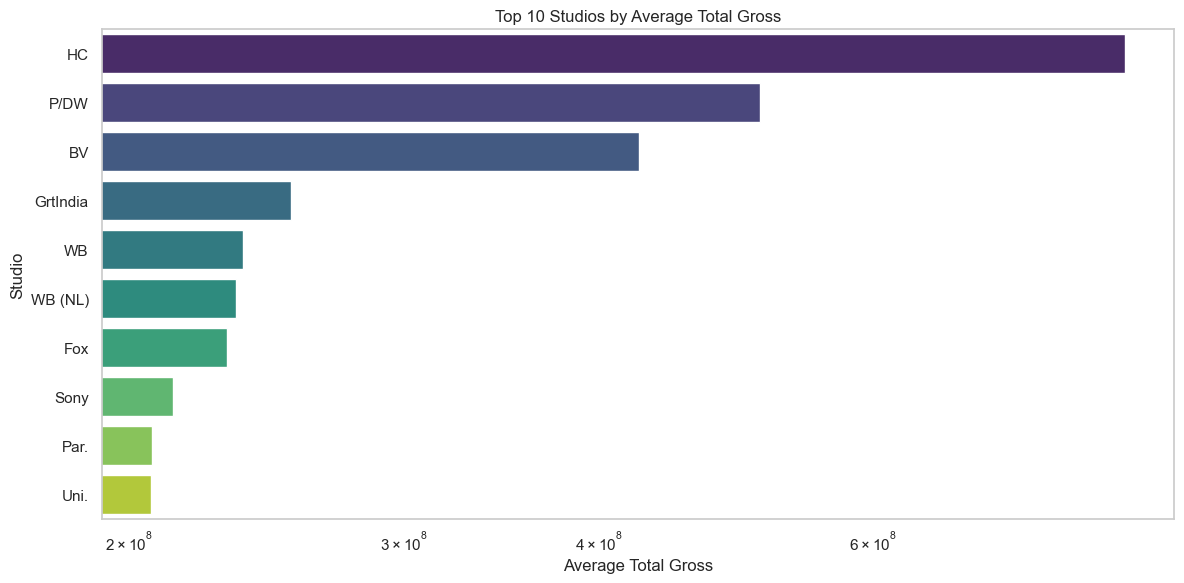

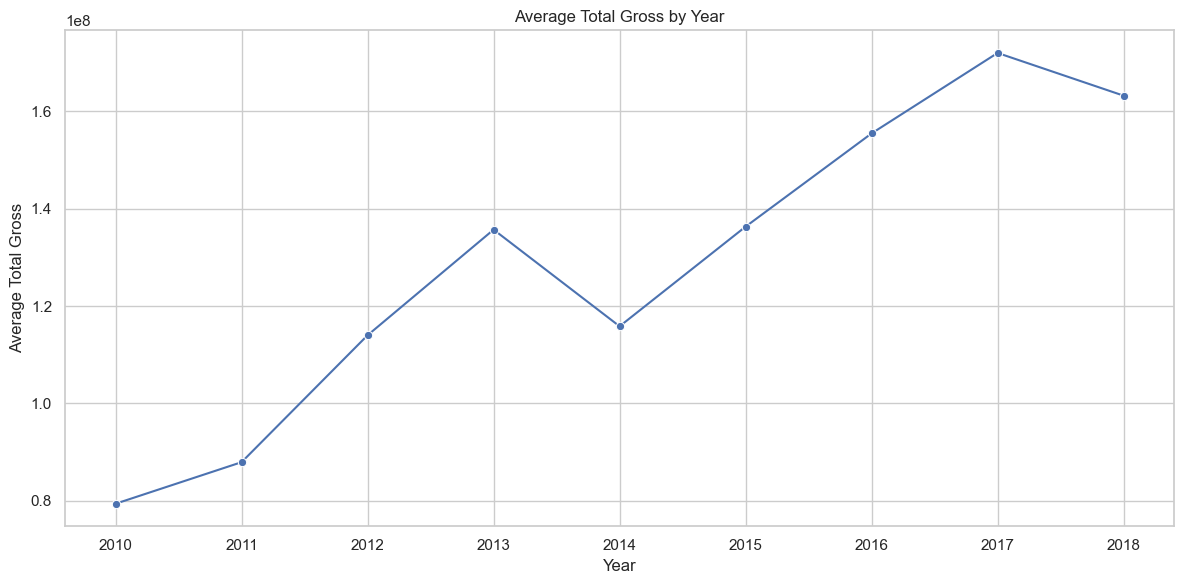

Top 10 Movies by Total Gross:
                                            title studio   total_gross
727                         Marvel's The Avengers     BV  1.518900e+09
1875                      Avengers: Age of Ultron     BV  1.405400e+09
3080                                Black Panther     BV  1.347000e+09
328   Harry Potter and the Deathly Hallows Part 2     WB  1.341500e+09
2758                     Star Wars: The Last Jedi     BV  1.332600e+09
3081               Jurassic World: Fallen Kingdom   Uni.  1.309500e+09
1127                                       Frozen     BV  1.276400e+09
2759                  Beauty and the Beast (2017)     BV  1.263500e+09
3082                                Incredibles 2     BV  1.242800e+09
1128                                   Iron Man 3     BV  1.214800e+09

Top 10 Studios by Average Total Gross:
studio
HC          8.703000e+08
P/DW        5.076500e+08
BV          4.249075e+08
GrtIndia    2.542000e+08
WB          2.368577e+08
WB (NL)     2.344

In [36]:
file_path = 'bom.movie_gross.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Clean the 'foreign_gross' column by removing commas and converting to float
data['foreign_gross'] = data['foreign_gross'].str.replace(',', '').astype(float)

# Calculate total gross
data['total_gross'] = data['domestic_gross'] + data['foreign_gross']

# Get the top 10 movies by total gross
top_movies = data.nlargest(10, 'total_gross')

# Visualize the top 10 movies by total gross

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='total_gross', y='title', data=top_movies, palette='viridis')
plt.title('Top 10 Movies by Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Movie Title')
plt.xscale('log')
plt.tight_layout()
plt.show()

# Calculate the average gross by studio
average_gross_by_studio = data.groupby('studio')['total_gross'].mean().sort_values(ascending=False).head(10)

# Visualize the average gross by studio
plt.figure(figsize=(12, 6))
sns.barplot(x=average_gross_by_studio.values, y=average_gross_by_studio.index, palette='viridis')
plt.title('Top 10 Studios by Average Total Gross')
plt.xlabel('Average Total Gross')
plt.ylabel('Studio')
plt.xscale('log')
plt.tight_layout()
plt.show()

# Calculate the average gross by year
average_gross_by_year = data.groupby('year')['total_gross'].mean().sort_values(ascending=False)

# Visualize the average gross by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_gross_by_year.index, y=average_gross_by_year.values, marker='o')
plt.title('Average Total Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Gross')
plt.tight_layout()
plt.show()

# Return the top 10 movies and the average gross by studio and year for preview
print('Top 10 Movies by Total Gross:')
print(top_movies[['title', 'studio', 'total_gross']])
print('\nTop 10 Studios by Average Total Gross:')
print(average_gross_by_studio)
print('\nAverage Total Gross by Year:')
print(average_gross_by_year)

RECOMMEDATIONS

To provide concrete business recommendations for Microsoft's new movie studio, we've conducted an exploratory analysis of the movie gross dataset. Here's a storyline that encapsulates our findings and suggestions:


Focus on Blockbusters

: The top 10 movies by total gross revenue indicate that high-earning movies can significantly impact the studio's success. Microsoft should consider investing in potential blockbuster franchises or high-profile directors and casts to increase the chances of producing a top-grossing film.
Collaborate with Successful Studios


: The analysis of average gross by studio shows that certain studios consistently produce high-grossing films. Microsoft could benefit from partnerships or co-productions with these studios to leverage their expertise and market presence.


Timing and Trends
: The average gross by year suggests that there might be optimal times to release movies or specific trends to follow. Microsoft should analyze market trends and timing to optimize the release schedule for their films.